In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import
data = pd.read_csv('data.csv')

data.head()

,Age,Height
0,10,130
1,11,148
2,12,138
3,13,138
4,14,139


In [47]:
#store data in form of dependent and independent variables separately
x = data.iloc[:, 0:1].values #zero column one
y = data.iloc[:,1].values

In [48]:
#split the dataset into training and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [49]:
#import the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#create a decision tree regressor object from DecisionTreeRegressor class
DtReg = DecisionTreeRegressor(random_state = 0) #so i can get the same result

#fit the decision tree regresor with training data represented by c_train and y_train
DtReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
#predict height from test dataset w.r.t decision tree regression

y_predict_dtr = DtReg.predict((x_test))

#model evaluation using r-square for deicision tree  regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_dtr)
print("R-Square Error associated with Decision Tree Regression is", r_square)

R-Square Error associated with Decision Tree Regression is 0.5162536940213684


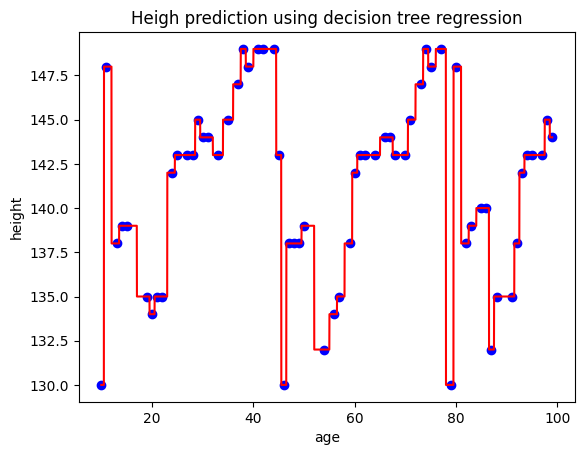

<Figure size 100x100 with 0 Axes>

In [51]:
''''Visualise the decision tree regression by creating range values from min of x_train to max value of having
a difference of 0.01 between two consecutives values'''

x_val = np.arange(min(x_train), max(x_train),0.01)

#reshape the data into a len(x_val)*1 array in order to make a column out of the x_val values
x_val = x_val.reshape((len(x_val),1))

#define a scatter plot for training data
plt.scatter(x_train, y_train, color='blue')

#plot the predicted data
plt.plot(x_val, DtReg.predict(x_val), color='red')

#title, axes
plt.title('Heigh prediction using decision tree regression')
plt.xlabel('age')
plt.ylabel('height')

#set the size of the plot for better clarity
plt.figure(figsize=(1,1))

plt.show()

In [52]:
#import export_graphviz package
from sklearn.tree import export_graphviz

#store the decision tree in a tree.dot file in roder to visualize the plot
#visialize it on www.webgraphviz.com by copy paste the data from the dtregressio.dot file

export_graphviz(DtReg, out_file='dtregression.dot', feature_names=['age'])


In [53]:
#predicting height based on age using decision tree regression
height_pred = DtReg.predict([[41]])
print("Predicted Height: % d"% height_pred)

Predicted Height:  149
